In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.signal import convolve2d

TEST


In [2]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv, yv


(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))

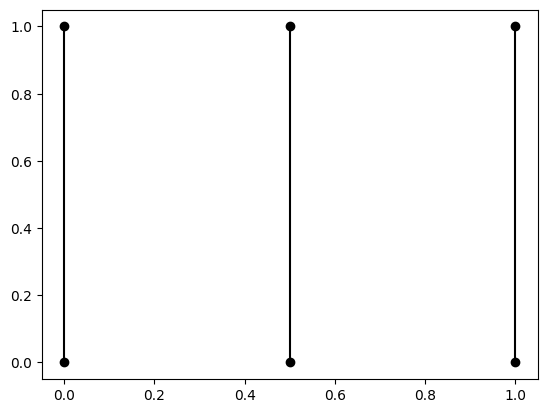

In [3]:
plt.plot(xv,yv, marker='o', color='k')# ,linestyle='none')
plt.show()


In [4]:
nx, ny = (1920*3, 1080*3)
x = np.linspace(0, 1919, nx)
y = np.linspace(0, 1079, ny)
xv, yv = np.meshgrid(x, y)
xv
yv

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33127508e-01, 3.33127508e-01, 3.33127508e-01, ...,
        3.33127508e-01, 3.33127508e-01, 3.33127508e-01],
       [6.66255017e-01, 6.66255017e-01, 6.66255017e-01, ...,
        6.66255017e-01, 6.66255017e-01, 6.66255017e-01],
       ...,
       [1.07833374e+03, 1.07833374e+03, 1.07833374e+03, ...,
        1.07833374e+03, 1.07833374e+03, 1.07833374e+03],
       [1.07866687e+03, 1.07866687e+03, 1.07866687e+03, ...,
        1.07866687e+03, 1.07866687e+03, 1.07866687e+03],
       [1.07900000e+03, 1.07900000e+03, 1.07900000e+03, ...,
        1.07900000e+03, 1.07900000e+03, 1.07900000e+03]])

In [5]:
np.zeros((100, 100))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

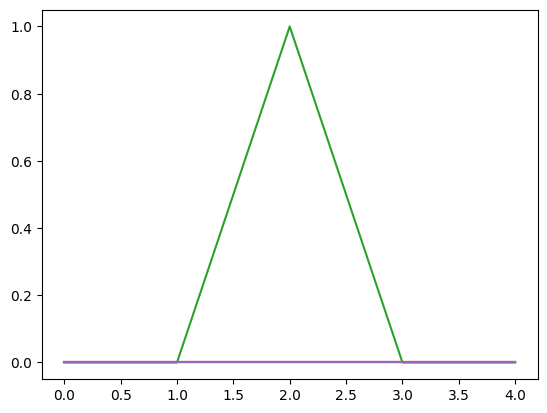

In [7]:
plt.plot(x)

my stuff

In [119]:
def prey_reaction(prey, predator, Diffusion_prey_rate, feed, kernel, delta_t):
    return prey + (Diffusion_prey_rate*convolve2d(convolve2d(prey, kernel, mode="same"), kernel, mode="same") - prey * predator ** 2 + feed * (1-prey)) * delta_t

def predator_reaction(prey, predator, Diffusion_predator_rate, kill, feed, kernel, delta_t):
    return predator + (Diffusion_predator_rate*convolve2d(convolve2d(prey, kernel, mode="same"), kernel, mode="same") + prey * predator ** 2 - (kill + feed) * predator) * delta_t

def step(ax, time):
    ax[0].clear()
    # ax[1].clear()

    ax[0].imshow(prey_reaction, cmap='jet')
    # ax[1].imshow(predator_reaction, cmap='brg')
    
    ax[0].grid(b=False)
    # ax[1].grid(b=False)
    
    ax[0].set_title("A, t = {:.2f}".format(time))
    # ax[1].set_title("B, t = {:.2f}".format(self.t))
    

In [133]:
width, height = 100 , 100
# prey_grid = abs(np.random.rand(width, height)) #prey cells
prey_grid = np.ones((width, height)) 
# predator_grid = abs(np.random.rand(width, height))#np.zeros((width, height)) #predator cells
predator_grid = np.zeros((width, height))
num_of_predators = width * height * 0.02
# np.random.randint(5, size=(2, 4))
for i in range(int(num_of_predators)):
    predator_grid[np.random.randint(width),np.random.randint(height)] = 1



Diffusion_prey_rate = 1
Diffusion_predator_rate = 0.5
kernel = [[0.05,0.2,0.05],
          [0.2,-1,0.2],
          [0.05,0.2,0.05]]
feed = 0.055
kill = 0.062

delta_t = 1
number_of_delta_t_iterations = int(1) 
number_of_steps = 1

time = 0

1.973 1.973


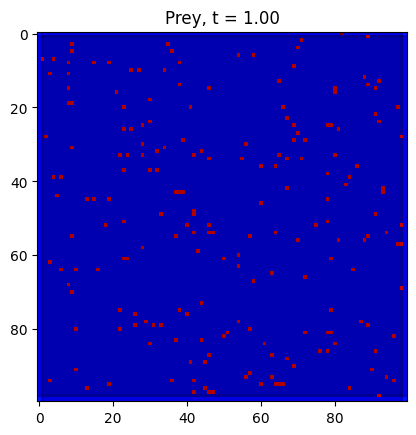

In [134]:
fig, ax = plt.subplots()
for no in range(number_of_steps):
    for delta_step in range(number_of_delta_t_iterations):
        prey_grid_new = prey_reaction(prey_grid, predator_grid, Diffusion_prey_rate, feed, kernel, delta_t)
        predator_grid_new = predator_reaction(prey_grid, predator_grid, Diffusion_predator_rate, kill, feed, kernel, delta_t)
        prey_grid = predator_grid_new
        predator_grid = predator_grid_new 
        time += delta_t
        print(np.max(prey_grid), np.max(predator_grid))
    ax.clear()
    ax.imshow(prey_grid, cmap='jet')
    # ax.grid(b=False)
    ax.set_title("Prey, t = {:.2f}".format(time))

In [96]:
np.seterr()

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

NameError: name 'n_steps' is not defined

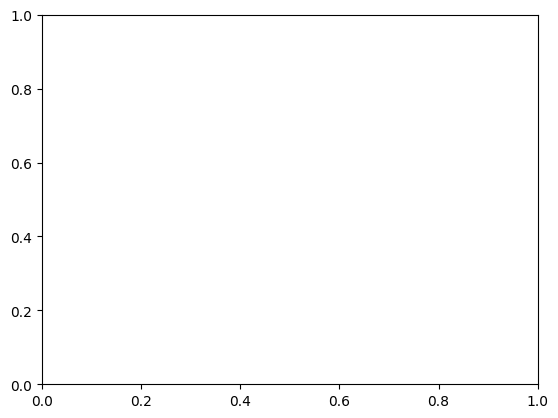

In [80]:
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, step, frames=np.arange(n_steps), interval=20)
anim.save(filename=filename, dpi=60, fps=10, writer='imagemagick')
plt.close()

In [12]:
np.shape(prey_grid), np.shape(predator_grid)

((50, 50), (50, 50))

(np.float64(1.0), np.float64(1.0))

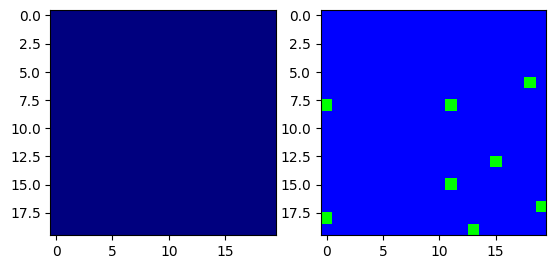

In [126]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(prey_grid, cmap='jet')
ax[1].imshow(predator_grid, cmap='brg')
np.max(prey_grid), np.max(predator_grid)